# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [10]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (0.6302887248689582, 0.7296835277747329)
1      (0.412826081813297, 0.8134969993427723)
2     (0.5935030924139642, 0.7432286474008785)
3     (0.9697098264755863, 0.6157865327576417)
4    (0.33321422182530114, 0.8465321392492184)
dtype: object

#### Interpret the normaltest results and make your observations.

In [7]:
# Explain the test results here
# El p-valor, segundo valor de la tupla, tiene valores de 0 a 1. Tradicionalmente con un valor de 0.05
# se acepta la hipotesis alternativa. Con los valores obtenidos no podemos descartar la hipotesis nula
# por lo tanto aceptamos que la distribución puede ser normal.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

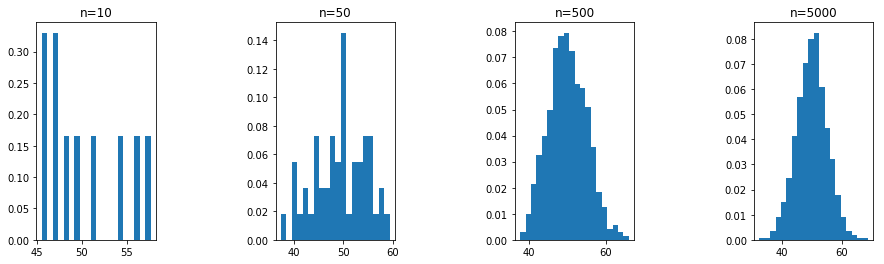

In [8]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [11]:
# Your comment and explanation here
# Cuanto mayor es la muestra mas facil es que cumpla con una distribución normal.
# La teoria nos indica que con una muestra infinita todas las distribuciones son normales.
# Teoria central del limite.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

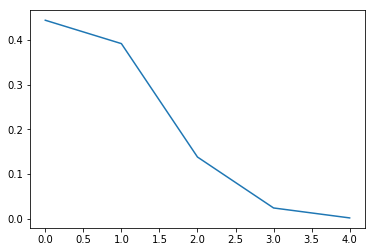

In [12]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [16]:
# Your comment here
# Que la probabilidad de que nadie pinche en el anunco es más alta que la probabilidad de que pinchen
# mas personas. La probabilidad de que pinchen las 5 personas es 0 o casi 0.

#### Now plot PMP with 50, 500, and 5000 visitors.

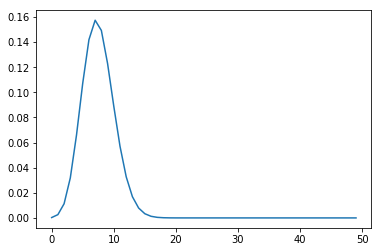

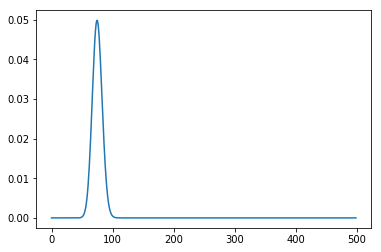

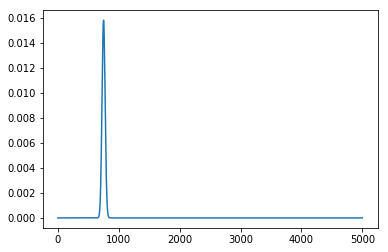

In [17]:
# Your code here
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
# Cuanto más muestra menos probable de que nadie pinche en el anuncio.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [18]:
# Your comment here
'''En teoría de probabilidad y estadística, la distribución de Poisson es una distribución 
de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, 
la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. 
Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, 
o sucesos "raros".
'''

'En teoría de probabilidad y estadística, la distribución de Poisson es una distribución \nde probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, \nla probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. \nConcretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, \no sucesos "raros".\n'

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

La probabilidad de 320 visitantes es 0.011612348610402475


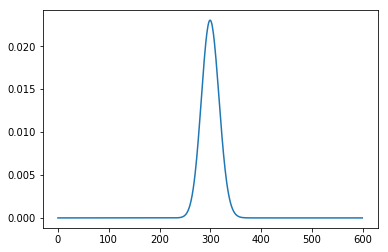

In [20]:
# Your code here
from scipy.stats import poisson

lamb=300
x = range(2*lamb)
dist = poisson(lamb)
print ('La probabilidad de 320 visitantes es {}'.format(dist.pmf(320)))

fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))


#### What is the probability of getting 60 visits?

La probabilidad de 60 visitantes es 2.622743762294515e-64


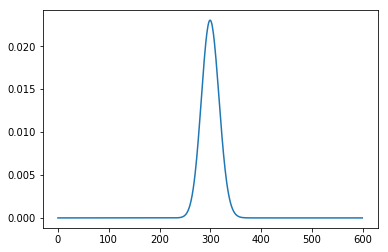

In [22]:
# Your code here
lamb=300
x = range(2*lamb)
dist = poisson(lamb)
print ('La probabilidad de 60 visitantes es {}'.format(dist.pmf(60)))

fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

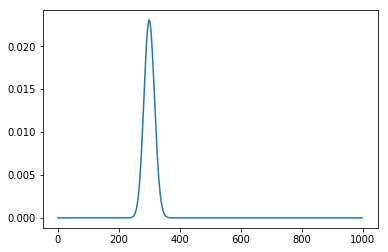

In [23]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)